

# Setting up the data of AAC descriptor extracted using iLearnPlus

In [2]:
import pandas as pd
pos=pd.read_csv("/content/LongPosAAC.csv",header=None)
neg=pd.read_csv("/content/LongNegAAC.csv",header=None)
pos.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,0,0.037736,0.113208,0.094340,0.075472,0.000000,0.075472,0.037736,0.037736,0.037736,...,0.018868,0.037736,0.018868,0.018868,0.056604,0.056604,0.000000,0.056604,0.037736,0.094340
1,0,0.096154,0.019231,0.019231,0.019231,0.000000,0.134615,0.000000,0.076923,0.057692,...,0.019231,0.019231,0.134615,0.115385,0.038462,0.076923,0.019231,0.076923,0.000000,0.019231
2,0,0.161290,0.048387,0.000000,0.048387,0.032258,0.241935,0.016129,0.016129,0.064516,...,0.016129,0.064516,0.016129,0.000000,0.032258,0.064516,0.016129,0.064516,0.048387,0.032258
3,0,0.018182,0.018182,0.036364,0.090909,0.000000,0.254545,0.018182,0.000000,0.000000,...,0.018182,0.036364,0.054545,0.072727,0.145455,0.090909,0.000000,0.036364,0.000000,0.109091
4,0,0.057692,0.115385,0.038462,0.019231,0.057692,0.173077,0.000000,0.038462,0.115385,...,0.057692,0.000000,0.038462,0.000000,0.019231,0.038462,0.038462,0.057692,0.019231,0.000000


In [3]:
print(pos.shape)
print(neg.shape)



(3776, 21)
(29640, 21)


In [8]:
#merging data of AAC descriptor
df=pd.concat([pos,neg.head(3776)])
df.head()


,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,0,0.037736,0.113208,0.094340,0.075472,0.000000,0.075472,0.037736,0.037736,0.037736,...,0.018868,0.037736,0.018868,0.018868,0.056604,0.056604,0.000000,0.056604,0.037736,0.094340
1,0,0.096154,0.019231,0.019231,0.019231,0.000000,0.134615,0.000000,0.076923,0.057692,...,0.019231,0.019231,0.134615,0.115385,0.038462,0.076923,0.019231,0.076923,0.000000,0.019231
2,0,0.161290,0.048387,0.000000,0.048387,0.032258,0.241935,0.016129,0.016129,0.064516,...,0.016129,0.064516,0.016129,0.000000,0.032258,0.064516,0.016129,0.064516,0.048387,0.032258
3,0,0.018182,0.018182,0.036364,0.090909,0.000000,0.254545,0.018182,0.000000,0.000000,...,0.018182,0.036364,0.054545,0.072727,0.145455,0.090909,0.000000,0.036364,0.000000,0.109091
4,0,0.057692,0.115385,0.038462,0.019231,0.057692,0.173077,0.000000,0.038462,0.115385,...,0.057692,0.000000,0.038462,0.000000,0.019231,0.038462,0.038462,0.057692,0.019231,0.000000


In [9]:
df = df.drop(df.columns[(df == 0).all()], axis=1)


In [10]:
df.shape

(7552, 20)

# Applying Kmean on AAC component only

In [11]:
shuffled_df = df.sample(frac=1).reset_index(drop=True)
X=shuffled_df

In [12]:
import matplotlib.pyplot as plt

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

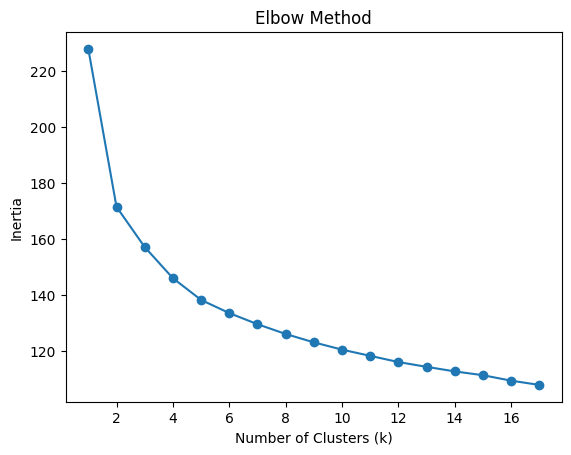

In [13]:
from sklearn.cluster import KMeans

# Perform K-means clustering for different values of k
k_values = range(1, 18)
inertia_values = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)

# Plotting the elbow curve
plt.plot(k_values, inertia_values, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [14]:
from sklearn.cluster import KMeans

k=2
kmeans=KMeans(n_clusters=k,random_state=42)
y_pred=kmeans.fit_predict(pos)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [15]:
y_pred is kmeans.labels_

True

In [16]:
kmeans.cluster_centers_

array([[0.        , 0.06851891, 0.04912644, 0.04556505, 0.06547464,
        0.04604372, 0.07356486, 0.01828515, 0.04968707, 0.07464855,
        0.09901804, 0.02487465, 0.0379001 , 0.04427358, 0.03497065,
        0.05750458, 0.06609176, 0.04976088, 0.06047895, 0.01001163,
        0.02420081],
       [0.        , 0.04598328, 0.00711341, 0.03460631, 0.04673046,
        0.01652082, 0.30425579, 0.00976519, 0.02617853, 0.0517849 ,
        0.05125567, 0.01405271, 0.01350023, 0.20260714, 0.03709473,
        0.04305066, 0.03767253, 0.02148584, 0.02608584, 0.00170712,
        0.00854885]])

In [17]:
kmeans.inertia_

79.64655854323371

In [18]:
from sklearn.metrics import silhouette_score

In [19]:
# Fit the model to the data and get the cluster assignments
labels = kmeans.fit_predict(shuffled_df)

# Ensure that X has the same number of samples as labels
X = shuffled_df

# Calculate the silhouette score
silhouette_avg = silhouette_score(X, labels)

print("Silhouette Score:", silhouette_avg)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score: 0.4280302001528423


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


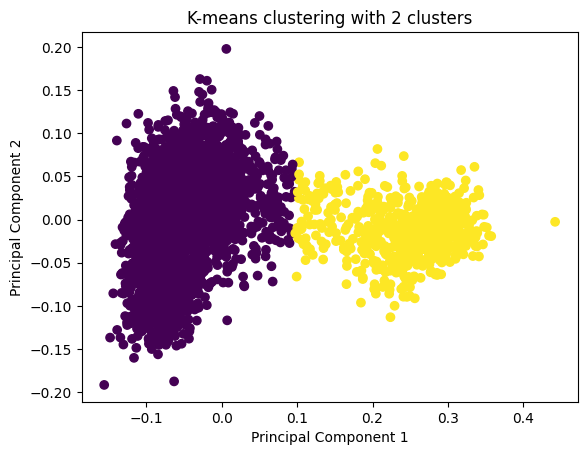

In [20]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


# Create a K-means clustering model with 2 clusters, using K-means++ initialization
kmeans = KMeans(n_clusters=2, init='k-means++', random_state=42)
y_pred = kmeans.fit_predict(pos)

# Perform PCA dimensionality reduction to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(pos)

# Create a scatter plot of the reduced data, colored by cluster assignments
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred)
plt.title("K-means clustering with 2 clusters")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

In [21]:
# Count the number of samples in each cluster
import numpy as np
counts = np.bincount(y_pred)

print(f"Number of samples in cluster 0: {counts[0]}")
print(f"Number of samples in cluster 1: {counts[1]}")

Number of samples in cluster 0: 3124
Number of samples in cluster 1: 652


# Applying DBSCAN

In [22]:
from sklearn.cluster import DBSCAN
dbscan=DBSCAN(eps=0.05,min_samples=5)
dbscan.fit(X)

DBSCAN(eps=0.05)

In [23]:
# Method 3: Silhouette Score
from sklearn.metrics import silhouette_score

best_eps = None
best_min_samples = None
best_score = -1

for eps in np.linspace(0.1, 1.0, num=10):
    for min_samples in range(2, 6):
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan.fit(X)
        labels = dbscan.labels_
        if len(np.unique(labels)) > 1:
            score = silhouette_score(X, labels)
            if score > best_score:
                best_score = score
                best_eps = eps
                best_min_samples = min_samples

In [24]:
print(f"best_eps :{best_eps}")
print(f"best_min_samples :{best_min_samples}")


best_eps :0.30000000000000004
best_min_samples :3


In [25]:
dbscan=DBSCAN(eps=0.3,min_samples=2)
dbscan.fit(X)

DBSCAN(eps=0.3, min_samples=2)

In [26]:
# Evaluate using Silhouette Score
labels = dbscan.labels_
silhouette_avg = silhouette_score(X, labels)

print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.6051316876028786


# Applying Agglomerative Clustering

In [27]:
# Apply Agglomerative Clustering
from sklearn.cluster import AgglomerativeClustering


agg_clustering = AgglomerativeClustering(n_clusters=4)
agg_clustering.fit(X)

# Evaluate using Silhouette Score
labels = agg_clustering.labels_
silhouette_avg = silhouette_score(X, labels)

print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.10515579229975283


# GMM

In [28]:
from sklearn.mixture import GaussianMixture
gm = GaussianMixture(n_components=2, n_init=10)
gm.fit(X)

GaussianMixture(n_components=2, n_init=10)

In [29]:
gm.weights_

array([0.86204384, 0.13795616])

In [30]:
gm.means_

array([[0.07336351, 0.03459034, 0.04588604, 0.06639961, 0.03981867,
        0.067335  , 0.01955894, 0.05580264, 0.08443184, 0.09267453,
        0.02857502, 0.03891084, 0.03904676, 0.03415986, 0.06495424,
        0.06187655, 0.05152108, 0.0671055 , 0.00932856, 0.02466047],
       [0.05688412, 0.00976747, 0.03787853, 0.05395823, 0.02194729,
        0.22629093, 0.01629299, 0.032198  , 0.05008859, 0.06568506,
        0.01792127, 0.01992536, 0.15849408, 0.04630277, 0.04778709,
        0.05328688, 0.03169794, 0.03381326, 0.00318973, 0.01659041]])

In [31]:
gm.covariances_

array([[[ 2.04099721e-03, -3.62145606e-04, -1.41212794e-04,
         -2.63389844e-04, -1.94017174e-04,  7.17276079e-05,
         -8.89062742e-05, -9.55514887e-05, -1.36708001e-04,
         -1.63167821e-04, -2.73215052e-05, -1.27699474e-04,
         -9.19580724e-05, -1.16910581e-05, -9.92546523e-05,
         -1.27952728e-04, -7.97674164e-05,  1.17884900e-04,
         -3.30583816e-05, -1.85807426e-04],
        [-3.62145606e-04,  1.99805644e-03, -1.11165198e-04,
         -4.52581200e-04,  6.17724952e-05,  2.38418230e-04,
         -1.25420633e-06, -3.30937845e-04, -3.94407824e-04,
         -3.54136989e-04, -9.73855387e-05,  4.28439512e-05,
          2.43504980e-04, -1.01093577e-04, -2.94352138e-04,
          1.82171064e-04,  1.18138010e-05, -3.69756157e-04,
          5.66061412e-06,  8.59747053e-05],
        [-1.41212794e-04, -1.11165198e-04,  8.25089412e-04,
          2.87642581e-04,  6.17199128e-06, -1.54010034e-04,
         -4.67146570e-05,  5.61835301e-06, -1.85394282e-04,
         -3.

In [32]:
gm.converged_

True

In [33]:
gm.n_iter_

21

Silhouette Score: 0.33547844202342764


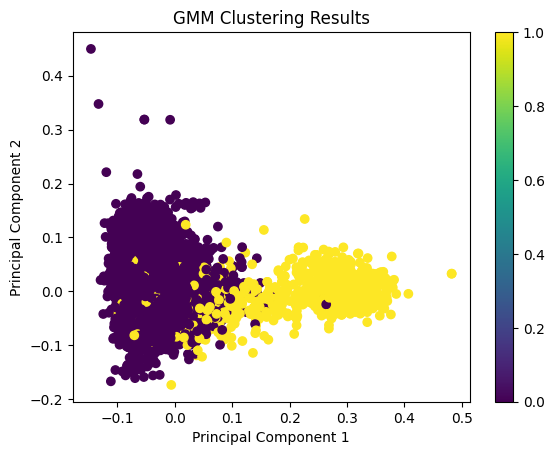

In [35]:
predicted_labels = gm.predict(X)

# Calculate the Silhouette Score
silhouette_avg = silhouette_score(X, predicted_labels)
print(f"Silhouette Score: {silhouette_avg}")

# Visualize the clustering results
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=predicted_labels, cmap='viridis')
plt.title("GMM Clustering Results")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar()
plt.show()

# Setting up the data of GAAC descriptor extracted using iLearnPlus

In [ ]:
p=pd.read_csv("LongPosGAAC.csv")
n=pd.read_csv("LongNegGAAC.csv")
n

In [ ]:
p.drop('0',axis=1,inplace=True)
n.drop('0',axis=1,inplace=True)

n

In [ ]:
# Define the new column names
new_column_names = ['alphatic', 'aromatic', 'positivecharge', 'negativecharge', 'uncharge']

# Rename the columns
p.columns = new_column_names
n.columns= new_column_names
n

In [ ]:
#adding labels to each sort of data
n['Output']=0
p['Output']=1
df2=pd.concat([p,n.head(3775)])
df2

In [ ]:
df2

# Merging the data of two descriptors AAC & GAAC

In [ ]:
df=pd.concat([df1,df2],axis=1)
df

In [ ]:
df.drop("output",axis=1,inplace=True)
df

In [ ]:
#shuffling the dataset
dataset = df.sample(frac=1).reset_index(drop=True)
dataset

# Applying ML


In [ ]:
#Importing different classifier from sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.gaussian_process.kernels import RBF
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop(['Output'], axis = 1).values
y = df['Output'].values

#define a seed for reproducibility
seed = 1

# Splitting data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = seed)

In [ ]:
# Define scoring method
scoring = 'accuracy'
# Model building to train
names = ['K Nearest Neighbors', 'Decision Tree', 'Random Forest', 'Neural Net', 'AddaBoost', 'Naive Bayes', 'SVM Linear', 'SVM RBF', 'SVM Sigmoid']
Classifiers = [
    KNeighborsClassifier(n_neighbors = 3),
    DecisionTreeClassifier(max_depth = 5),
    RandomForestClassifier(max_depth = 5, n_estimators = 10, max_features = 1 ),
    MLPClassifier(alpha = 1),
    AdaBoostClassifier(),
    GaussianNB(),
    svm.SVC(kernel = 'linear'),
    svm.SVC(kernel = 'rbf'),
    svm.SVC(kernel = 'sigmoid')

    ]
models = zip(names, Classifiers)
# import KFold
from sklearn.model_selection import KFold, cross_val_score

names = []
result = []
for name, model in models:
    kfold = KFold(n_splits = 10)
    cv_results = cross_val_score(model, X_train, y_train, cv = kfold, scoring = 'accuracy')
    result.append(cv_results)
    names.append(name)
    msg = "{0}: {1} ({2})".format(name, cv_results.mean(), cv_results.std())
    print(msg)

In [ ]:
#Test the algorithm on the test data set
models = zip(names, Classifiers)
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(name)
    print(accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))

In [ ]:
from sklearn.model_selection import train_test_split

# Split data into train, validation, and test sets
X_train, X_val_test, y_train, y_val_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.5, random_state=42)

# Train and evaluate model
model.fit(X_train, y_train)
train_acc = model.score(X_train, y_train)
val_acc = model.score(X_val, y_val)
test_acc = model.score(X_test, y_test)

print("Train Accuracy:", train_acc)
print("Validation Accuracy:", val_acc)
print("Test Accuracy:", test_acc)


In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
import numpy as np

train_sizes, train_scores, val_scores = learning_curve(model, X_train, y_train, cv=5, scoring='accuracy')

train_scores_mean = np.mean(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, label='Training Accuracy')
plt.plot(train_sizes, val_scores_mean, label='Validation Accuracy')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()